# DAY_4 EXERCISES


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
cast_df = pd.read_csv('cast.csv')
release_dates_df = pd.read_csv('release_dates.csv')
titles_df = pd.read_csv('titles.csv')

# Define a year as a "Superman Year" whose films feature more Superman characters than Batman.How many years in film history have been Superman Years?

In [11]:
# Merge the DataFrames based on 'title' and 'year'
merged_df = pd.merge(titles_df, cast_df, on=['title', 'year'], how='inner')
merged_df = pd.merge(merged_df, release_dates_df, on=['title', 'year'], how='inner')

# Filter rows for Superman and Batman characters
superman_df = merged_df[merged_df['character'] == 'Superman']
batman_df = merged_df[merged_df['character'] == 'Batman']


# Group by year and count the characters for each year
superman_years = superman_df.groupby('year')['character'].count()
batman_years = batman_df.groupby('year')['character'].count()

# Find the "Superman Years" (years with more Superman characters than Batman)
superman_years = superman_years.reset_index()
superman_years = superman_years.rename(columns={'character': 'superman_count'})
batman_years = batman_years.reset_index()
batman_years = batman_years.rename(columns={'character': 'batman_count'})

# Merge the DataFrames for Superman and Batman character counts
superman_vs_batman_df = pd.merge(superman_years, batman_years, on='year', how='inner')

# Filter "Superman Years" and "Batman Years"
superman_years = superman_vs_batman_df[superman_vs_batman_df['superman_count'] > superman_vs_batman_df['batman_count']]
batman_years = superman_vs_batman_df[superman_vs_batman_df['superman_count'] < superman_vs_batman_df['batman_count']]

# Count the years for each category
superman_years_count = superman_years['year'].nunique()
batman_years_count = batman_years['year'].nunique()

print(f"Number of Superman Years: {superman_years_count}")



Number of Superman Years: 2


# How many years have been "Batman Years", with more Batman Characters than Superman Characters?

In [12]:
print(f"Number of Batman Years: {batman_years_count}")

Number of Batman Years: 11


# Plot the number of actor roles each year and the number of actress roles each year over the history of film

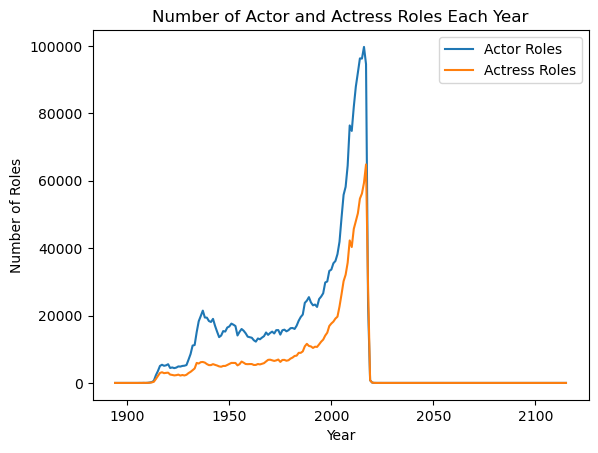

In [3]:
actor_roles = cast_df[cast_df['type'] == 'actor'].groupby('year').size()
actress_roles = cast_df[cast_df['type'] == 'actress'].groupby('year').size()
plt.plot(actor_roles.index, actor_roles.values, label='Actor Roles')
plt.plot(actress_roles.index, actress_roles.values, label='Actress Roles')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend()
plt.title('Number of Actor and Actress Roles Each Year')
plt.show()

# Plot the number of actor roles each year and the number of actress roles each year over the history of film, but this time as a kind='area' plot.

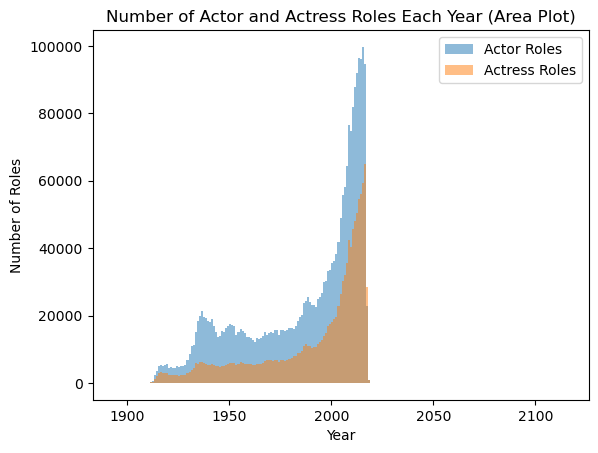

In [4]:
plt.fill_between(actor_roles.index, actor_roles.values, alpha=0.5, label='Actor Roles', step='pre')
plt.fill_between(actress_roles.index, actress_roles.values, alpha=0.5, label='Actress Roles', step='pre')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend()
plt.title('Number of Actor and Actress Roles Each Year (Area Plot)')
plt.show()

# Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film

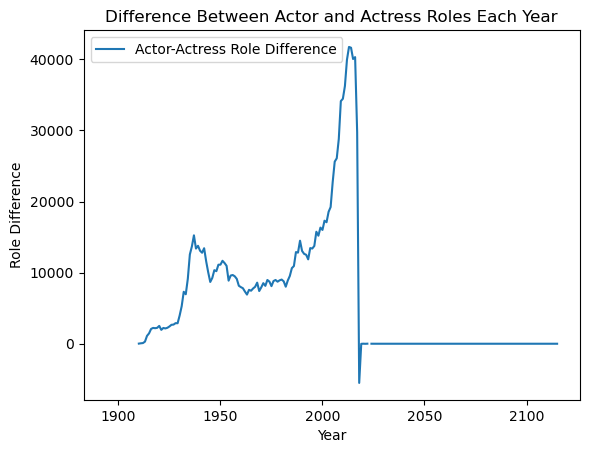

In [5]:
role_difference = actor_roles - actress_roles
plt.plot(role_difference.index, role_difference.values, label='Actor-Actress Role Difference')
plt.xlabel('Year')
plt.ylabel('Role Difference')
plt.legend()
plt.title('Difference Between Actor and Actress Roles Each Year')
plt.show()

# Plot the fraction of roles that have been 'actor' roles each year in the history of film

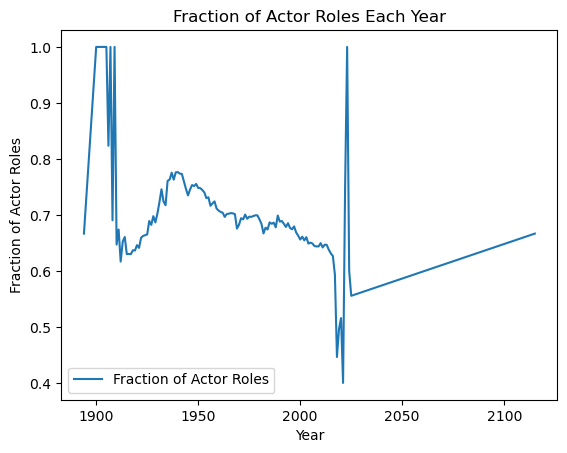

In [6]:
total_roles = cast_df.groupby('year').size()
fraction_actor_roles = actor_roles / total_roles
plt.plot(fraction_actor_roles.index, fraction_actor_roles.values, label='Fraction of Actor Roles')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.legend()
plt.title('Fraction of Actor Roles Each Year')
plt.show()

# Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film

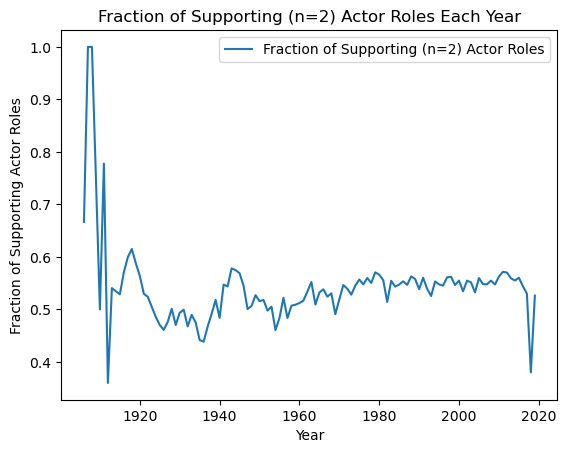

In [7]:
supporting_roles = cast_df[cast_df['n'] == 2]
supporting_actor_roles = supporting_roles[supporting_roles['type'] == 'actor'].groupby('year').size()
fraction_supporting_actor_roles = supporting_actor_roles / supporting_roles.groupby('year').size()
plt.plot(fraction_supporting_actor_roles.index, fraction_supporting_actor_roles.values, label='Fraction of Supporting (n=2) Actor Roles')
plt.xlabel('Year')
plt.ylabel('Fraction of Supporting Actor Roles')
plt.legend()
plt.title('Fraction of Supporting (n=2) Actor Roles Each Year')
plt.show()

# Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film

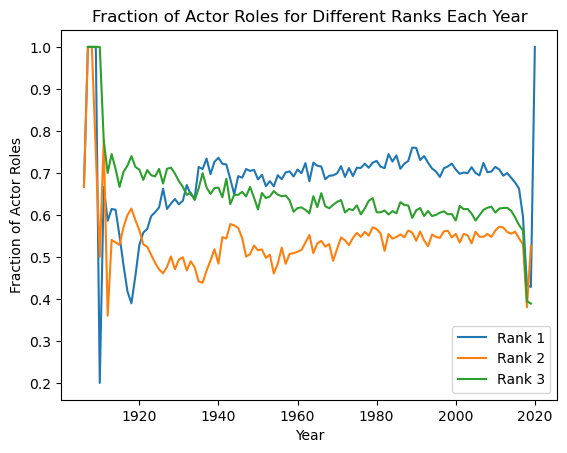

In [8]:
for n in range(1, 4):
    rank_roles = cast_df[cast_df['n'] == n]
    rank_actor_roles = rank_roles[rank_roles['type'] == 'actor'].groupby('year').size()
    fraction_rank_actor_roles = rank_actor_roles / rank_roles.groupby('year').size()
    plt.plot(fraction_rank_actor_roles.index, fraction_rank_actor_roles.values, label=f'Rank {n}')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.legend()
plt.title('Fraction of Actor Roles for Different Ranks Each Year')
plt.show()